1. name: Yi-Ping Tseng
2. uni: yt2690
3. email: yiping.t@columbia.edu
4. collaborate with: Zihui Zhou (uni: zz2694)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

### Setup - Preprocessed Data 
randomly split dataset into train and test set <br>
by using `pandas` and `sklearn.model_selection`

In [2]:
data = pd.read_csv("winequalityred.csv", sep=";")
y = ["quality"]
x = data.drop(y, axis=1).columns.values

print("features: ", x)
print("target: ", y)
print("data shape: ", data.shape)
data.head(3)

features:  ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
target:  ['quality']
data shape:  (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [3]:
seed = 100
kf = KFold(shuffle=False, n_splits=5, random_state=seed)
for trainIdx, testIdx in kf.split(data):
    X_train, X_test = data[x].iloc[trainIdx], data[x].iloc[testIdx]
    y_train, y_test = data[y].iloc[trainIdx], data[y].iloc[testIdx]

In [4]:
print(X_train.shape, y_train.shape)
pd.concat([X_train.head(3), y_train.head(3)], axis=1)

(1280, 11) (1280, 1)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [5]:
X_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000
mean,8.577891,0.518984,0.289297,2.561328,0.088838,15.448438,46.794531,0.996971,3.299641,0.663711,10.400391
std,1.768994,0.177994,0.196441,1.311638,0.047896,10.320531,33.592566,0.001893,0.155147,0.174030,1.095970
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.300000,0.390000,0.120000,1.900000,0.071000,7.000000,21.000000,0.995900,3.200000,0.560000,9.500000
50%,8.200000,0.500000,0.280000,2.200000,0.080000,13.000000,38.000000,0.996990,3.300000,0.620000,10.100000
75%,9.600000,0.630000,0.450000,2.600000,0.092000,21.000000,63.000000,0.998030,3.392500,0.730000,11.100000
max,15.900000,1.330000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003200,3.900000,2.000000,14.900000


In [6]:
print(X_test.shape, y_test.shape)
pd.concat([X_test.head(3), y_test.head(3)], axis=1)

(319, 11) (319, 1)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1280,7.1,0.460,0.2,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4,6
1281,7.1,0.460,0.2,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4,6
1282,7.9,0.765,0.0,2.0,0.084,9.0,22.0,0.99619,3.33,0.68,10.9,6


### Regression equations and functions
1. adding intercept
2. the equation for a the linear model that predicts y from X
3. the equation for computing the Residual Sum of Squares (RSS) for the linear model

by using `pandas` and `numpy`

In [7]:
def predict(beta, X):
    if isinstance(beta, (pd.DataFrame, pd.Series)):
        beta = beta.values
    
    if isinstance(X, (pd.DataFrame, pd.Series)):
        index = X.index.values
        X = X.values
    
    if beta.shape[0] - X.shape[1] == 1:
        X = np.concatenate([np.ones(shape=(X.shape[0], 1)), X], axis=1)
    
    return pd.DataFrame(np.matmul(X, beta), index=index, columns=["y_hat"])


def RSS(beta, X, y):
    tmp = pd.concat([y, predict(beta, X)], axis=1)
    
    if pd.isnull(tmp).any(axis=1).sum():
        raise ValueError("y and y_hat indexes are mismatched")
        
    return tmp.apply(lambda s: (s[0] - s[1])**2, axis=1).sum()

### Training Models
by using `pandas` and `scipy.optimize`

In [8]:
beta = np.random.normal(0, 1, (X_train.shape[1] + 1, 1))
opt = minimize(fun=RSS, x0=beta, args=(X_train, y_train))
beta_hat = opt.x

In [9]:
beta_hat

array([ 2.39956491e+01,  2.34934995e-02, -1.05499800e+00, -1.82862239e-01,
        1.06302233e-02, -1.75743048e+00,  3.26745286e-03, -3.68408259e-03,
       -2.00912301e+01, -3.43003458e-01,  8.05258489e-01,  2.83317495e-01])

In [10]:
print("RSS in training set:")
RSS(beta_hat, X_train, y_train)

RSS in training set:


532.0667485668739

In [11]:
print("RSS in testing set:")
RSS(beta_hat, X_test, y_test)

RSS in testing set:


137.7884551877433

### Question 1

1. What are the qualitative results from your model? <br>
2. Which features seem to be most important? <br>
3. Do you think that the magnitude of the features in X may affect the results <br>
(for example, the average total sulfur dioxide across all wines is 46.47, <br>
 but the average chlorides is only 0.087).

### Ans:
<div class="alert alert-block alert-info">
1. my qualitative results show that density is the most significant feature, which has a negative relation with wine quality(y) <br>
2. density (with coefficient: -20.091) <br>
3. the magnitude (mean) of the features does not affect the coefficient by the evidence from plots and linear regression trained with normalized data. But, the standard deviation of the features does affect the coefficient of linear regression. The density has the smallest standard deviation, and get the most significant coefficient. The chlorides has the second smallest standard deviation, and get the second significant coefficient. </div>

In [12]:
pd.Series(beta_hat, index=["intercept"] + X_train.columns.values.tolist())\
    .round(3)\
    .sort_values()

density                -20.091
chlorides               -1.757
volatile acidity        -1.055
pH                      -0.343
citric acid             -0.183
total sulfur dioxide    -0.004
free sulfur dioxide      0.003
residual sugar           0.011
fixed acidity            0.023
alcohol                  0.283
sulphates                0.805
intercept               23.996
dtype: float64

<BarContainer object of 11 artists>

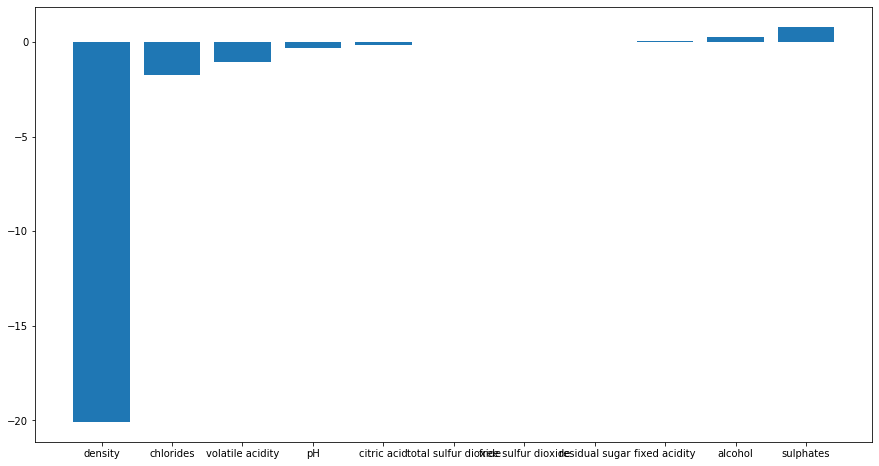

In [13]:
plt.figure(figsize=(15, 8))
plt.bar(X_train.columns[np.argsort(beta_hat[1:])], np.sort(beta_hat[1:]), align="center")

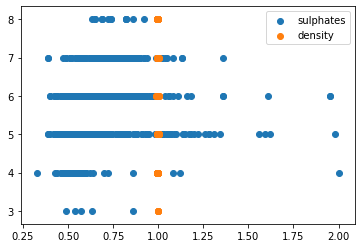

In [14]:
plt.scatter(X_train["sulphates"], y_train, label="sulphates")
plt.scatter(X_train["density"], y_train, label="density")
plt.legend()

In [15]:
X_train.describe().loc['std'].sort_values()

density                  0.001893
chlorides                0.047896
pH                       0.155147
sulphates                0.174030
volatile acidity         0.177994
citric acid              0.196441
alcohol                  1.095970
residual sugar           1.311638
fixed acidity            1.768994
free sulfur dioxide     10.320531
total sulfur dioxide    33.592566
Name: std, dtype: float64

In [16]:
X_train_mean = X_train.mean(axis=0)
norm_Xtrain = X_train - X_train_mean
pd.concat(
    [norm_Xtrain.mean(), norm_Xtrain.std()], axis=1
).rename(columns={0: "mean", 1: "std"})

,mean,std
fixed acidity,-1.540712e-14,1.768994
volatile acidity,-5.499073e-17,0.177994
citric acid,3.516501e-16,0.196441
residual sugar,-2.895253e-15,1.311638
chlorides,3.217153e-16,0.047896
free sulfur dioxide,-6.483702e-15,10.320531
total sulfur dioxide,-6.216139e-14,33.592566
density,8.559993e-16,0.001893
pH,5.467848e-16,0.155147
sulphates,-1.508169e-15,0.174030


In [17]:
norm_Xtrain.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-1.177891,0.181016,-0.289297,-0.661328,-0.012838,-4.448438,-12.794531,0.000829,0.210359,-0.103711,-1.000391
1,-0.777891,0.361016,-0.289297,0.038672,0.009162,9.551562,20.205469,-0.000171,-0.099641,0.016289,-0.600391
2,-0.777891,0.241016,-0.249297,-0.261328,0.003162,-0.448438,7.205469,0.000029,-0.039641,-0.013711,-0.600391


In [18]:
beta = np.random.normal(0, 1, (norm_Xtrain.shape[1] + 1, 1))
norm_opt = minimize(fun=RSS, x0=beta, args=(norm_Xtrain, y_train))
norm_beta_hat = norm_opt.x

pd.Series(norm_beta_hat, index=["intercept"] + X_train.columns.values.tolist())\
    .round(3)\
    .sort_values()

density                -20.090
chlorides               -1.757
volatile acidity        -1.055
pH                      -0.343
citric acid             -0.183
total sulfur dioxide    -0.004
free sulfur dioxide      0.003
residual sugar           0.011
fixed acidity            0.023
alcohol                  0.283
sulphates                0.805
intercept                5.665
dtype: float64

In [19]:
RSS(norm_beta_hat, norm_Xtrain, y_train)

532.0667485610833

In [20]:
norm_Xtest = X_test - X_train_mean
RSS(norm_beta_hat, norm_Xtest, y_test)

137.7884492625132

### Question 1 (cont.)

4. How well does your model fit? <br>
5. You should be able to measure the goodness of fit, RSS, on both the training data and the test data, but only report the results on the test data. <br>

In Machine Learning we almost always only care about<br> 
how well the model fits on data that has not been used to fit the model, <br>
because we need to use the model in the future, not the past. <br>
Therefore, we only report performance with holdout data, or test data.

In [21]:
def r_square(y_true, y_pred):
    if len(y_true) != len(y_pred):
        raise ValueError("length mismatched")
    
    tmp = pd.concat([y_true, y_pred], axis=1)
    tmp.columns = ["y_true", "y_pred"]
    ss_res = sum((tmp["y_true"] - tmp["y_pred"])**2)
    ss_tot = sum((tmp["y_true"] - tmp["y_true"].mean())**2)
    return 1 - ss_res/ss_tot

### Ans:
1. this is the model performance on testing set

In [22]:
print("Model Performance in the Test Set: ")
print("RSS: ", RSS(beta_hat, X_test, y_test))
print("R^2: ", r_square(y_test, predict(beta_hat, X_test)))

Model Performance in the Test Set: 
RSS:  137.7884551877433
R^2:  0.28091945808837193


### Question 1 (cont.)

6. Does the end result or RSS change if you try different initial values of β? <br>
7. What happens if you change the magnitude of the initial β?<br>
8. Does the choice of solver method change the end result or RSS? 

### Ans
1. it does not change a lot when we try different init value, the magnitude of beta, or the solver. it always trains a similar model.

In [23]:
beta = np.random.normal(0, 1, (X_train.shape[1] + 1, 1))
print("new init beta: ", beta.reshape(1, -1)[0], "\n")
opt = minimize(fun=RSS, x0=beta, args=(X_train, y_train))
new_beta_hat = opt.x
print("the diff between new beta hat and beta hat", new_beta_hat - beta_hat, "\n")
print("new RSS in training set: ", RSS(new_beta_hat, X_train, y_train))
print("new RSS in testing set: ", RSS(new_beta_hat, X_test, y_test))

new init beta:  [ 0.162382   -0.65975988 -1.29170349  0.16041755 -0.17331564  0.18030522
 -1.87046837  0.74813601  0.48806078  0.62408526  1.44855439 -0.85141569] 

the diff between new beta hat and beta hat [-1.76143623e-03 -1.16790827e-06 -1.46276924e-06 -4.14199594e-06
 -4.52008238e-07  5.75278377e-06 -2.86614499e-08  1.81617176e-08
  1.77723934e-03 -4.88007195e-06 -1.80721394e-06  1.81820888e-06] 

new RSS in training set:  532.0667485630977
new RSS in testing set:  137.78841077287936


In [24]:
beta = np.random.normal(100, 10, (X_train.shape[1] + 1, 1))
print("new init beta: ", beta.reshape(1, -1)[0], "\n")
opt = minimize(fun=RSS, x0=beta, args=(X_train, y_train))
new_beta_hat = opt.x
print("the diff between new beta hat and beta hat", new_beta_hat - beta_hat, "\n")
print("new RSS in training set: ", RSS(new_beta_hat, X_train, y_train))
print("new RSS in testing set: ", RSS(new_beta_hat, X_test, y_test))

new init beta:  [ 90.25832836  90.48570987  88.00789998 106.2302923   98.22283601
 108.84823665 101.55855569 106.98080518 104.40826858  95.35101564
  97.43709075  82.46072558] 

the diff between new beta hat and beta hat [-1.57176907e-03 -1.44199176e-06 -1.66528178e-06 -4.00717397e-07
 -6.94120507e-07 -3.66496702e-06  1.18286542e-08 -2.70573254e-09
  1.60152095e-03 -7.42020014e-06 -2.03070285e-06  1.56525534e-06] 

new RSS in training set:  532.066748564245
new RSS in testing set:  137.78844870399897


In [25]:
beta = np.random.normal(0, 1, (X_train.shape[1] + 1, 1))
print("new init beta: ", beta.reshape(1, -1)[0], "\n")
opt = minimize(fun=RSS, x0=beta, args=(X_train, y_train), method="Powell")
new_beta_hat = opt.x
print("the diff between new beta hat and beta hat", new_beta_hat - beta_hat, "\n")
print("new RSS in training set: ", RSS(new_beta_hat, X_train, y_train))
print("new RSS in testing set: ", RSS(new_beta_hat, X_test, y_test))

new init beta:  [-0.64142291  0.87114277  0.95370145 -1.05412244  0.23181434 -0.85379947
 -0.03488099 -0.26708025  0.91362247  0.29046226  2.26676174 -3.16144032] 

the diff between new beta hat and beta hat [-2.85037209e-01 -2.34421838e-04 -8.99621681e-04 -4.64887608e-04
 -1.10157921e-04  1.08482915e-03  5.24314018e-07  5.47170639e-07
  2.90574928e-01 -1.24619025e-03 -9.43487072e-04  2.75219429e-04] 

new RSS in training set:  532.0668295342499
new RSS in testing set:  137.78972086250522


### Question 2

In [26]:
def RSS(beta, X, y, penalty=None, lam=0):
    tmp = pd.concat([y, predict(beta, X)], axis=1)
    
    if pd.isnull(tmp).any(axis=1).sum():
        raise ValueError("y and y_hat indexes are mismatched")
        
        
    if penalty == "l1":
        penalty = lam * sum(abs(beta[1:]))
    elif penalty == "l2":
        penalty = lam * sum(beta[1:]**2)
    else:
        penalty = 0
        
    return tmp.apply(lambda s: (s[0] - s[1])**2, axis=1).sum() + penalty

##### Ridge Regression (L2)

In [27]:
beta = np.random.normal(0, 1, (X_train.shape[1] + 1, 1))
opt = minimize(fun=RSS, x0=beta, args=(X_train, y_train, "l2"))
beta_hat_L2 = opt.x

In [28]:
pd.DataFrame(
    np.array([beta_hat, beta_hat_L2]).T, 
    index=["intercept"] + X_train.columns.values.tolist(),
    columns=["beta_hat", "beta_hat_L2"]
).round(3)

,beta_hat,beta_hat_L2
intercept,23.996,5.663
fixed acidity,0.023,0.005
volatile acidity,-1.055,-1.072
citric acid,-0.183,-0.181
residual sugar,0.011,0.003
chlorides,-1.757,-1.807
free sulfur dioxide,0.003,0.003
total sulfur dioxide,-0.004,-0.004
density,-20.091,-1.363
pH,-0.343,-0.438


1. How does RSS on the training data change? How does RSS on the test data change?

### Ans
<div class="alert alert-block alert-info">
Both RSS in train and test set are slightly lower. That is probably because there is no collinearity or overfitting issue in the original regression. Hence, RSS does not decrease that much.</div>

In [29]:
print("Ridge Regression Performance")
print("RSS in train set: ", RSS(beta_hat_L2, X_train, y_train))
print("RSS in test set: ", RSS(beta_hat_L2, X_test, y_test))

Ridge Regression Performance
RSS in train set:  532.3205564637317
RSS in test set:  137.76116427515305


In [30]:
print("Ridge Regression RSS in test set")
beta = np.random.normal(0, 1, (X_train.shape[1] + 1, 1))

lam = 0.001
opt = minimize(fun=RSS, x0=beta, args=(X_train, y_train, "l2", lam))
print("when lambda=%.3f" % lam, RSS(opt.x, X_test, y_test))

lam = 0.01
opt = minimize(fun=RSS, x0=beta, args=(X_train, y_train, "l2", lam))
print("when lambda=%.3f" % lam, RSS(opt.x, X_test, y_test))

lam = 0.1
opt = minimize(fun=RSS, x0=beta, args=(X_train, y_train, "l2", lam))
print("when lambda=%.3f" % lam, RSS(opt.x, X_test, y_test))

lam = 1
opt = minimize(fun=RSS, x0=beta, args=(X_train, y_train, "l2", lam))
print("when lambda=%.3f" % lam, RSS(opt.x, X_test, y_test))

lam = 10
opt = minimize(fun=RSS, x0=beta, args=(X_train, y_train, "l2", lam))
print("when lambda=%.3f" % lam, RSS(opt.x, X_test, y_test))

Ridge Regression RSS in test set
when lambda=0.001 137.7538011320214
when lambda=0.010 137.761174809492
when lambda=0.100 137.80505586721966
when lambda=1.000 138.31549568655723
when lambda=10.000 142.2356816915538


### Ans
<div class="alert alert-block alert-info">
the results shows when lambda=0.001 Ridge Regression has the best performance on testing set.</div>

##### Lasso Regression (L1)

In [31]:
print("Lasso Regression RSS in test set")
beta = np.random.normal(0, 1, (X_train.shape[1] + 1, 1))

lam = 0.001
opt = minimize(fun=RSS, x0=beta, args=(X_train, y_train, "l1", lam))
print("when lambda=%.3f" % lam, RSS(opt.x, X_test, y_test))

lam = 0.01
opt = minimize(fun=RSS, x0=beta, args=(X_train, y_train, "l1", lam))
print("when lambda=%.3f" % lam, RSS(opt.x, X_test, y_test))

lam = 0.1
opt = minimize(fun=RSS, x0=beta, args=(X_train, y_train, "l1", lam))
print("when lambda=%.3f" % lam, RSS(opt.x, X_test, y_test))

lam = 1
opt = minimize(fun=RSS, x0=beta, args=(X_train, y_train, "l1", lam))
print("when lambda=%.3f" % lam, RSS(opt.x, X_test, y_test))

lam = 10
opt = minimize(fun=RSS, x0=beta, args=(X_train, y_train, "l1", lam))
print("when lambda=%.3f" % lam, RSS(opt.x, X_test, y_test))

Lasso Regression RSS in test set
when lambda=0.001 137.78528452836593
when lambda=0.010 137.76461291400477
when lambda=0.100 137.78750393426554
when lambda=1.000 138.07138465738728
when lambda=10.000 142.56632719500345


In [46]:
lam = 0.01
opt = minimize(fun=RSS, x0=beta, args=(X_train, y_train, "l1", lam))
print("when lambda=%.3f" % lam, RSS(opt.x, X_test, y_test))

when lambda=0.010 137.76461291400477


In [47]:
pd.Series(opt.x[1:], index=X_test.columns.values).round(3).sort_values()

density                -13.232
chlorides               -1.776
volatile acidity        -1.061
pH                      -0.378
citric acid             -0.182
total sulfur dioxide    -0.004
free sulfur dioxide      0.003
residual sugar           0.008
fixed acidity            0.017
alcohol                  0.290
sulphates                0.798
dtype: float64

In [49]:
lam = 10
opt = minimize(fun=RSS, x0=beta, args=(X_train, y_train, "l1", lam))
print("when lambda=%.3f" % lam, RSS(opt.x, X_test, y_test))
pd.Series(opt.x[1:], index=X_test.columns.values).round(3).sort_values()

when lambda=10.000 142.56632719500345


volatile acidity       -0.975
total sulfur dioxide   -0.004
citric acid            -0.000
residual sugar         -0.000
chlorides              -0.000
density                 0.000
pH                      0.000
free sulfur dioxide     0.004
fixed acidity           0.023
alcohol                 0.310
sulphates               0.468
dtype: float64

### Ans
<div class="alert alert-block alert-info">
the magnitude of the features in X won't affect the results with regularization. Since regularization only shrinks the less informative features and expands the more informative features, so the magnitude does not affect the result with regularization.</div>